In [37]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, train_test_split
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df_train = pd.read_csv('../data/train.csv')
df_valid = pd.read_csv('../data/val.csv')

In [39]:
# Encode categorical features
df_train_encoded = df_train.copy()
categorical_features = ['Gender', 'H_Cal_Consump',
 'Alcohol_Consump', 'Smoking',
 'Food_Between_Meals', 'Fam_Hist',
 'H_Cal_Burn', 'Phys_Act', 'Transport']
for feature in categorical_features:
 le = LabelEncoder()
 df_train_encoded[feature] = le.fit_transform(df_train_encoded[feature])

df_valid_encoded = df_valid.copy()
for feature in categorical_features:
    le = LabelEncoder()
    df_valid_encoded[feature] = le.fit_transform(df_valid_encoded[feature])

In [40]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(df_train_encoded.drop('Body_Level', axis=1), df_train_encoded['Body_Level'])

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']

# Print the best value of k
print(best_k)

1


In [41]:
X_train = df_train_encoded.drop('Body_Level', axis=1)
y_train = df_train_encoded['Body_Level']

X_valid = df_valid_encoded.drop('Body_Level', axis=1)
y_valid = df_valid_encoded['Body_Level']

In [42]:
# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_valid)

# Print the accuracy score
print('Accuracy score: ', knn.score(X_valid, y_valid))

Accuracy score:  0.7702702702702703


# Print the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
labels = list(set(y_valid))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [44]:
# Try out all the other Datasets in class_imbalance folder
x_train_undersampled = pd.read_csv('../data/class_Imbalance/X_under_sampled_no_relationship.csv')
y_train_undersampled = pd.read_csv('../data/class_Imbalance/y_under_sampled_no_relationship.csv')

x_train_oversampled = pd.read_csv('../data/class_Imbalance/X_over_sampled_no_relationship.csv')
y_train_oversampled = pd.read_csv('../data/class_Imbalance/y_over_sampled_no_relationship.csv')

x_train_smotenc = pd.read_csv('../data/class_Imbalance/X_SMOTENC_no_relationship.csv')
y_train_smotenc = pd.read_csv('../data/class_Imbalance/y_SMOTENC_no_relationship.csv')

y_train_smotenc = y_train_smotenc.rename(columns={'Body_Level_Num': 'Body_Level'})
y_train_smotenc['Body_Level'] = y_train_smotenc['Body_Level'].map({1: 'Body Level 1', 2: 'Body Level 2', 3: 'Body Level 3', 4: 'Body Level 4'})


x_train_smote_with_importance = pd.read_csv('../data/class_Imbalance/X_SMOTE_with_importance.csv')
y_train_smote_with_importance = pd.read_csv('../data/class_Imbalance/y_SMOTE_with_importance.csv')

y_train_smote_with_importance = y_train_smote_with_importance.rename(columns={'Body_Level_Num': 'Body_Level'})

y_train_smote_with_importance['Body_Level'] = y_train_smote_with_importance['Body_Level'].map({1: 'Body Level 1', 2: 'Body Level 2', 3: 'Body Level 3', 4: 'Body Level 4'})


In [45]:
# Encode categorical features
x_train_undersampled_encoded = x_train_undersampled.copy()
x_train_oversampled_encoded = x_train_oversampled.copy()
x_train_smotenc_encoded = x_train_smotenc.copy()
x_train_smote_with_importance_encoded = x_train_smote_with_importance.copy()

for feature in categorical_features:
    le = LabelEncoder()
    x_train_undersampled_encoded[feature] = le.fit_transform(x_train_undersampled_encoded[feature])
    x_train_oversampled_encoded[feature] = le.fit_transform(x_train_oversampled_encoded[feature])
    x_train_smotenc_encoded[feature] = le.fit_transform(x_train_smotenc_encoded[feature])
    x_train_smote_with_importance_encoded[feature] = le.fit_transform(x_train_smote_with_importance_encoded[feature])

In [46]:
# Create and fit the KNN classifier to the undersampled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_undersampled_encoded, y_train_undersampled['Body_Level'])

# Make predictions on the Valid set
y_pred = knn.predict(X_valid)


print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

Body Level 1       0.61      0.91      0.73        34
Body Level 2       0.61      0.26      0.37        42
Body Level 3       0.64      0.76      0.69        80
Body Level 4       0.88      0.82      0.85       140

    accuracy                           0.74       296
   macro avg       0.68      0.69      0.66       296
weighted avg       0.74      0.74      0.72       296



In [47]:
# Create and fit the KNN classifier to the oversampled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_oversampled_encoded, y_train_oversampled['Body_Level'])

# Make predictions on the Valid set
y_pred = knn.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

Body Level 1       0.65      0.94      0.77        34
Body Level 2       0.82      0.21      0.34        42
Body Level 3       0.66      0.71      0.69        80
Body Level 4       0.87      0.93      0.90       140

    accuracy                           0.77       296
   macro avg       0.75      0.70      0.67       296
weighted avg       0.78      0.77      0.75       296



In [48]:
# Create and fit the KNN classifier to the smotenc data
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train_smotenc_encoded, y_train_smotenc['Body_Level'])

# Make predictions on the Valid set
y_pred = knn.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

Body Level 1       0.66      0.97      0.79        34
Body Level 2       0.82      0.21      0.34        42
Body Level 3       0.68      0.71      0.70        80
Body Level 4       0.86      0.93      0.89       140

    accuracy                           0.77       296
   macro avg       0.75      0.71      0.68       296
weighted avg       0.78      0.77      0.75       296



In [49]:
# Create and fit the KNN classifier to the smote with importance data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_smote_with_importance_encoded, y_train_smote_with_importance['Body_Level'])

# Make predictions on the Valid set
y_pred = knn.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

Body Level 1       0.77      0.97      0.86        34
Body Level 2       0.90      0.21      0.35        42
Body Level 3       0.62      0.68      0.65        80
Body Level 4       0.84      0.94      0.89       140

    accuracy                           0.77       296
   macro avg       0.78      0.70      0.68       296
weighted avg       0.78      0.77      0.74       296



## Bias Variance Tradeoff

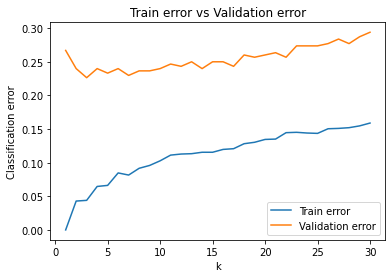

In [50]:
# Let's use the smotenc model to showcase the accuracy of the model against the value of k
# Create a list of values for k
# This is pretty much a bias vs variance tradeoff plot
k_list = list(range(1, 31))

train_errors = []
valid_errors = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_smotenc_encoded, y_train_smotenc['Body_Level'])
    train_error = 1 - knn.score(x_train_smotenc_encoded, y_train_smotenc['Body_Level'])
    valid_error = 1 - knn.score(X_valid, y_valid)
    train_errors.append(train_error)
    valid_errors.append(valid_error)

# Plot the train and validation errors vs. k
plt.plot(k_list, train_errors, label='Train error')
plt.plot(k_list, valid_errors, label='Validation error')
plt.xlabel('k')
plt.ylabel('Classification error')
plt.title('Train error vs Validation error')
plt.legend()
plt.show()

## Observations

This is a bias variance trade off plot, if a little weird looking (inverted). What's critical to understand for it to make sense is that increasing k actually leads to a less complex model. This can be traced to the decision boundary of the model for every k, for a k of 1 for example, the decision boundary is complex because it takes only one neighbor into consideration, so it follows the data points closely (can be thought of as overfitting), while when we increase k, it takes more neighbors into consideration, thus leading to a more general & smooth decision boundary which is less complex & generalizes better.

So, it's clear that as the model complexity decreases, the generalization performance of the model improves (the difference between the train & validation errors decreases) but the training & the validation errors themselves will increase because the model itself is less complex & less able to fit the data. 

In terms of bias & variance, the lower k values have less bias but more variance and as k increases, variance decreases but bias increases.

## Learning Curve

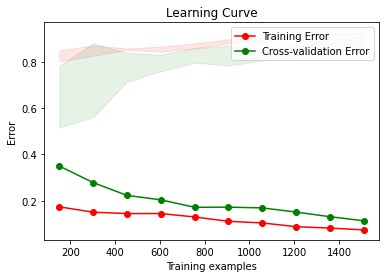

In [63]:
# Set the number of neighbors
k = 5

# Create a k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Compute the training and validation scores for different training set sizes
train_sizes, train_scores, valid_scores = learning_curve(
    knn,
    x_train_smotenc_encoded,
    y_train_smotenc['Body_Level'],
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
)

# Compute the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
         label="Training Error")
plt.plot(train_sizes, 1 - valid_scores_mean, 'o-', color="g",
         label="Cross-validation Error")
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.legend(loc="best")
plt.show()

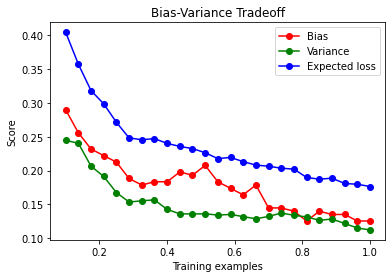

In [60]:
# Set the number of neighbors
k = 5


train_sizes = np.linspace(0.1, 1.0, 25)

# Initial split of the data
X_TRAIN, X_valid, Y_TRAIN, y_valid = train_test_split(
        df_train_encoded.drop('Body_Level', axis=1),
        df_train_encoded['Body_Level'],
        train_size=0.8,
        stratify=df_train_encoded['Body_Level'],
        random_state=42
    )

biases = []
variances = []
expected_losses = []

for train_size in train_sizes:
    # Split the data into training and validation sets
    if train_size == 1.0:
        X_train = X_TRAIN
        y_train = Y_TRAIN
    else:
        X_train = X_TRAIN.sample(frac=train_size, random_state=42)
        y_train = Y_TRAIN.loc[X_train.index]

    knn = KNeighborsClassifier(n_neighbors=k)

    # Compute the bias and variance
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        knn,
        X_train.values,
        y_train.map({'Body Level 1': 1, 'Body Level 2': 2, 'Body Level 3': 3, 'Body Level 4': 4,}).values,
        X_valid.values,
        y_valid.map({'Body Level 1': 1, 'Body Level 2': 2, 'Body Level 3': 3, 'Body Level 4': 4,}).values,
        loss='0-1_loss',
        random_seed=0,
    )
    biases.append(avg_bias)
    variances.append(avg_var)
    expected_losses.append(avg_expected_loss)

# Plot the bias and variance
plt.plot(train_sizes, biases, 'o-', color="r", label="Bias")
plt.plot(train_sizes, variances, 'o-', color="g", label="Variance")
plt.plot(train_sizes, expected_losses, 'o-', color="b", label="Expected loss")
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()